# Preamble

In [1]:
dir_home = '../'
dir_data = dir_home+'data/'
dir_fig = dir_home+'figs/'
import sys
sys.path.insert(0, dir_home)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from preamble import *
from natural_units_GeV import *
from param_card import *

# Signal

\begin{align}
(\Box + m^2) a &= \frac{\rho_\mathsf{S}}{f}\\
\rho_\mathsf{S} &= - 4\pi e \frac{\partial \mathsf{S}}{\partial \overline{\theta}} n_N \vec{\mathcal{M}} \cdot \hat{I}
\end{align}
A distance $\vec{D}$ away from an infinite, uniform slab of thickness $h$, we find:
\begin{align}
\vec{\nabla} \overline{\theta}_a = - \frac{\rho_S}{2 \chi_\mathrm{QCD}} m e^{-m D} (1 - e^{-m h}) \hat{D}
\end{align}
The precessional frequency of a nuclear spin is then given by:
\begin{align}
\Omega = c_{aNN} \left| \vec{\nabla} \overline{\theta}_a \right|
\end{align}

In [102]:
rho_S = 4 * np.pi * e_EM * S_schiff_over_theta * n_N * M_S * P_nuc
chi_QCD = (75.5 * MeV)**4

In [103]:
def fn_Omega_slab(m,D,h,rho_S):
    return rho_S / (2 * chi_QCD) * m * np.exp(-m*D) * (1-np.exp(-m*h))

def fn_S_Omega(T_2,n_N,vol):
    return 1/ (T_2 * n_N * vol)

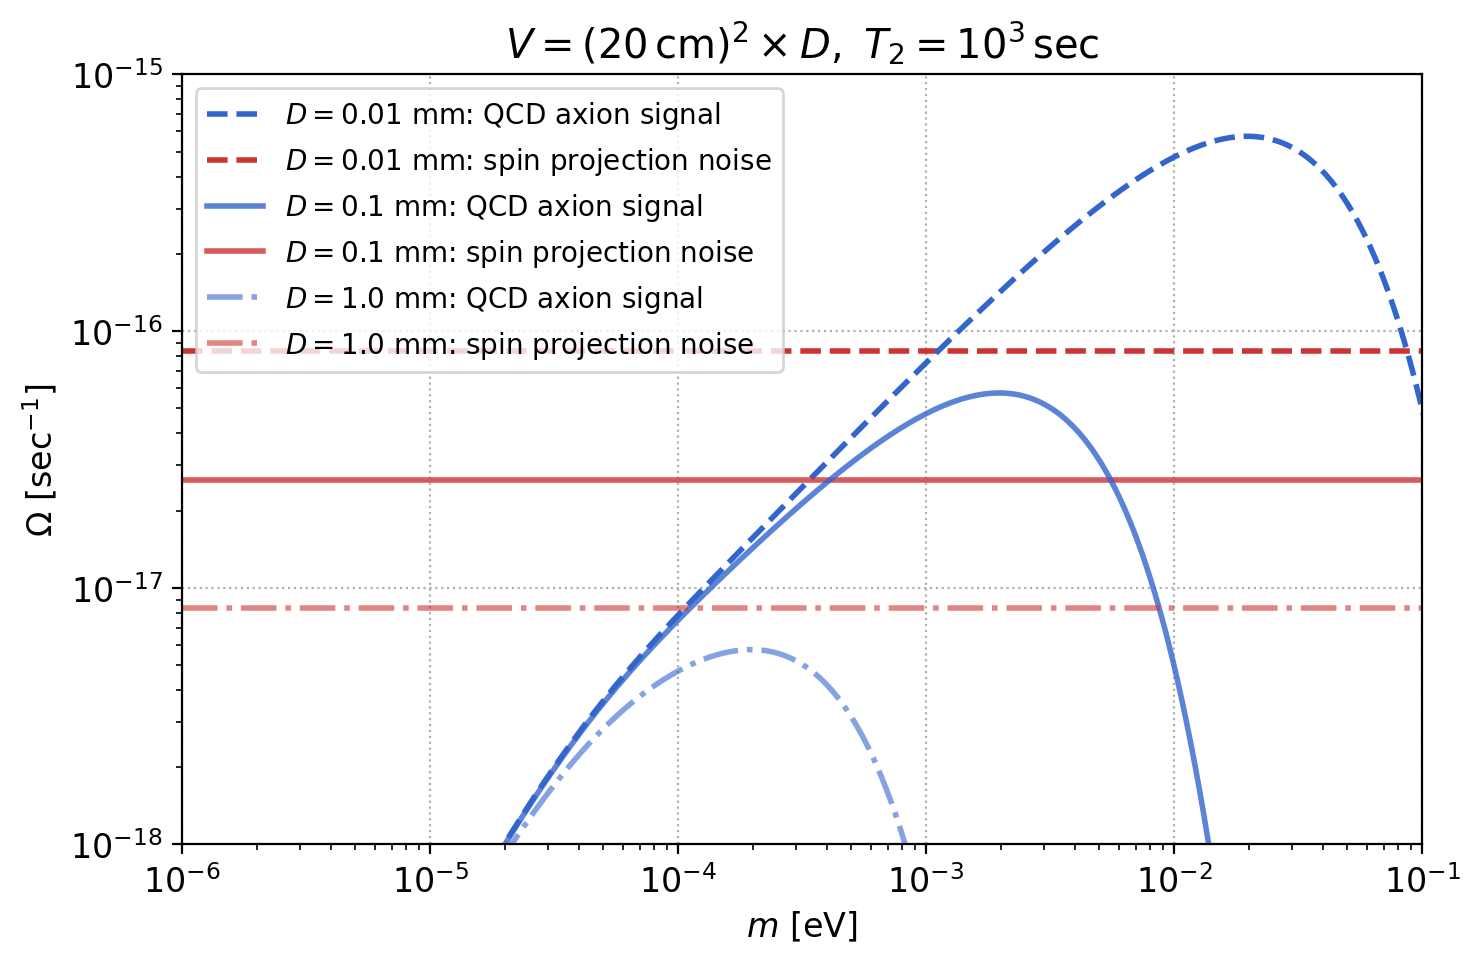

In [168]:
vec_D = np.asarray([0.01,0.1,1]) * mm
vec_ls = ['dashed','solid','dashdot']
h = 1 * cm
w = 20 * cm
T_2 = 1e3 * second
t_int = 1e7 * second
vec_label = ['$D = $'+str(D/mm)+' mm' for D in vec_D]

m = np.logspace(-6,0,int(1e3)) * eV
fig,ax = plt.subplots(1,1,figsize=(8,5))
for i_D,D in enumerate(vec_D):
    Omega = fn_Omega_slab(m,D,h,rho_S)
    vol = D * w**2
    Omega_sens = np.sqrt(fn_S_Omega(T_2,n_N,vol) / t_int)
    ax.axhline(Omega_sens/second**-1,lw=2,ls=vec_ls[i_D],color=(0.8,0.2,0.2,1-0.2*i_D),label=vec_label[i_D]+': spin projection noise')
    ax.plot(m/eV,Omega/second**-1,lw=2,ls=vec_ls[i_D],color=(0.2,0.4,0.8,1-0.2*i_D),label=vec_label[i_D]+': QCD axion signal')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(1e-6,1e-1);
ax.set_ylim(1e-18,1e-15);
ax.legend();
ax.set_ylabel(r'$\Omega~[\mathrm{sec^{-1}}]$');
ax.set_xlabel(r'$m~[\mathrm{eV}]$');
ax.grid(ls='dotted');
ax.set_title(r'$V = (20\,\mathrm{cm})^2 \times D, ~T_2 = 10^3 \, \mathrm{sec}$');
#get handles and labels
handles, labels = plt.gca().get_legend_handles_labels()
#specify order of items in legend
order = [1,0,3,2,5,4]
#add legend to plot
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],fontsize=10);